# Algerian Forest Fire Dataset - Logistic Regression

![forest fire image](https://cdn.theatlantic.com/thumbor/fgDWuTRXj9HE7YpkRKxJnkdQeLo=/900x600/media/img/photo/2022/07/photos-wildfires-rage-across-southw/a01_1241970129/original.jpg)

In [50]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Acquire Data

In [2]:
df = pd.read_csv('data/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df = df.drop(labels=[122,123], axis=0)

Data loaded successfully!

## Data Handling

> #### ***What features are available in the dataset?***

In [3]:
# Checking all columns

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
# Fixing the name of features with extra space
for i in df:
    df.rename(columns={i:i.strip()}, inplace=True)


# Checking fixed column names
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

> ##### ***Detailed Info of Features***


- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

- **Temp** : temperature noon (temperature max) in Celsius degrees: 22 to 42
- **RH** : Relative Humidity in %: 21 to 90
- **Ws** :Wind speed in km/h: 6 to 29
- **Rain**: total day in mm: 0 to 16.8

**Fire Weather Index (FWI) Components**

- Fine Fuel Moisture Code (**FFMC**) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (**DMC**) index from the FWI system: 1.1 to 65.9
- Drought Code (**DC**) index from the FWI system: 7 to 220.4
- Initial Spread Index (**ISI**) index from the FWI system: 0 to 18.5
- Buildup Index (**BUI**) index from the FWI system: 1.1 to 68
- Fire Weather Index (**FWI**) Index: 0 to 31.1
- **Classes**: two classes, namely Fire and not Fire

> #### ***Previewing & Checking datatype of dataset***

In [5]:
# Previewing dataset

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Our dataset has a total of 14 Features, out of them :-
- 1 is Dependent Feature. Named as ***CLASSES**.
- 13 other are Independent features

In [6]:
# Checking datatype of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


***Observation in Dataset*** :-

- Except the dependent feature i.e. Classes, all other 13 features are numerical.
- Classes feature has one missing value, while all others are good.
- There is an error in dataset that all numerical features are also classified as categorical. That need to be changed.
- These columns are supposed to be integers - day, month, year, Temperature, RH, Ws
- These columns are supposed to be float - Rain, FFMC, DMC, DC, ISI, BUI, FWI.

> #### ***Fixing the errors***

In [7]:
df[164:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


- Column DC has a misspelled value as **14.6 9** instead of **14.69**
- Column FWI has a string value instead of numeric
- Missing value in Classes column

In [8]:
# Fixing DC column
df.DC[167] = 14.69

# Fixing FWI column
df.FWI[167] = np.nan

# Fixing Classes column
cl_mode = df.Classes.mode()[0].strip()
df.Classes[167] = cl_mode

# Checking fixed data
df[164:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,fire
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [9]:
# Changing the datatype of required features into numeric

df[['day', 'month', 'Temperature' , 'RH','Ws']] = df[['day', 'month', 'Temperature' , 'RH','Ws']].apply(pd.to_numeric)
df.loc[:,'Rain':'FWI'] = df.loc[:,'Rain':'FWI'].apply(np.float64)

# Dropping wanted feature
df.drop(['year'], axis=1, inplace=True)

# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      244 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 34.8+ KB


In [10]:
# Fixing NaN value in FWI column

fwi_median = df.FWI.median()
df.FWI.replace(np.nan, fwi_median, inplace=True)

# Checking null value
df['FWI'].isnull().sum()

0

In [11]:
# Stripping unwanted space from Classes

df['Classes'] = df['Classes'].apply(lambda x:x.strip())

## Exploring & Analyzing Data

> #### ***Encoding the Dependent Feature***

In [12]:
# Encoding Classes feature. Assigning , Fire as 1 and Not Fire as 0.

df['Classes'] = np.where(df['Classes']=='fire', 1,0)

In [13]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350960,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083285,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.584188
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.507132
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.735511


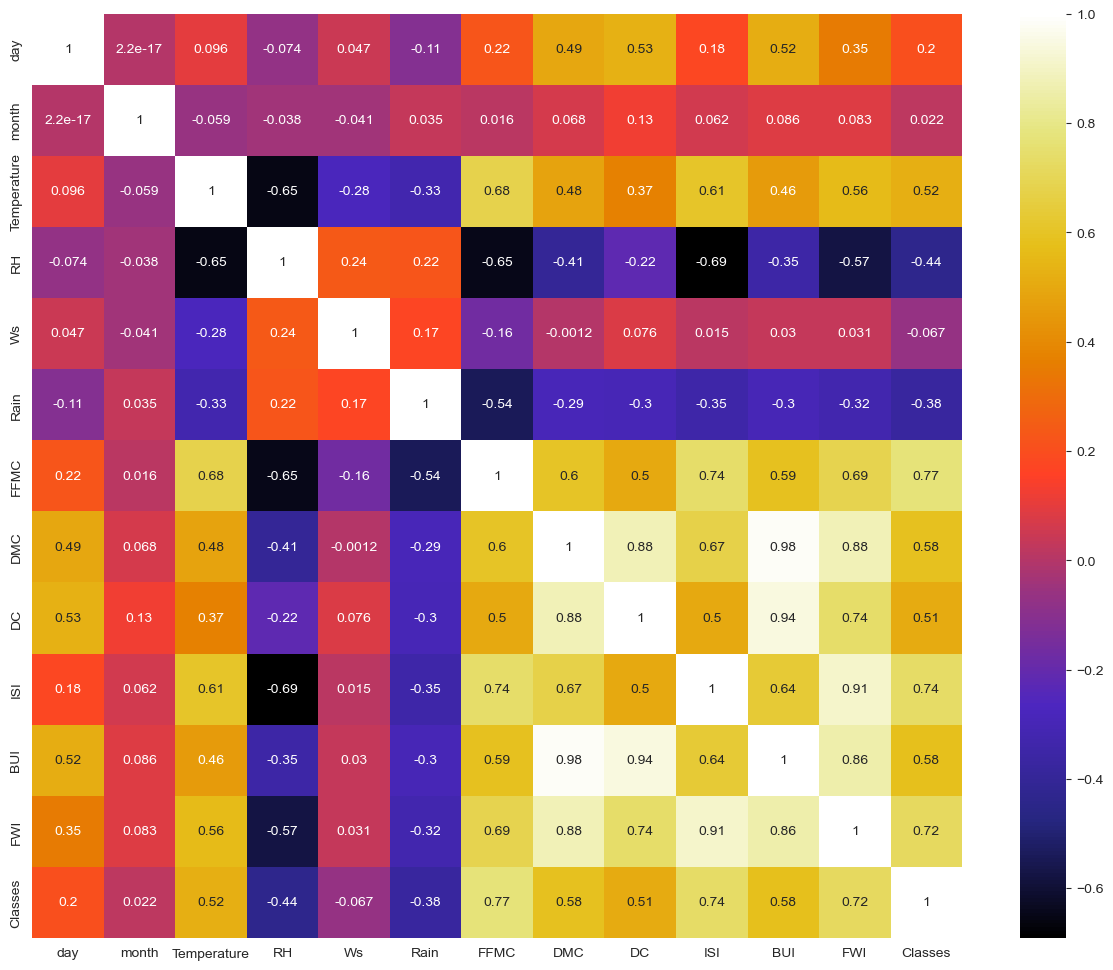

In [14]:
# Checking correlation between features

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='CMRmap', annot=True)
plt.show();

#### Report :

- Our Target column is Negative or Weak Correlation with RH (Relative humidity) & Rain. It's correct because more humidity in environment will decrease the chances of wild fire.
- FFMC, FWI, ISI has High Correlation with Forest Fire. More they are, higher the chances of Fire to spread.
- Relative Humidity is strongly negative correlated with ISI, FWI & FFMC.
- Duff Moisture Code & Buildup Index are very strongly correlated.
- Drought Code & Buildup Index are also strongly correlated.
- We can easily figure out that all the factors which are related to warmness in temperature or in general, they easily become the reason for fire.

## Univariate Analysis

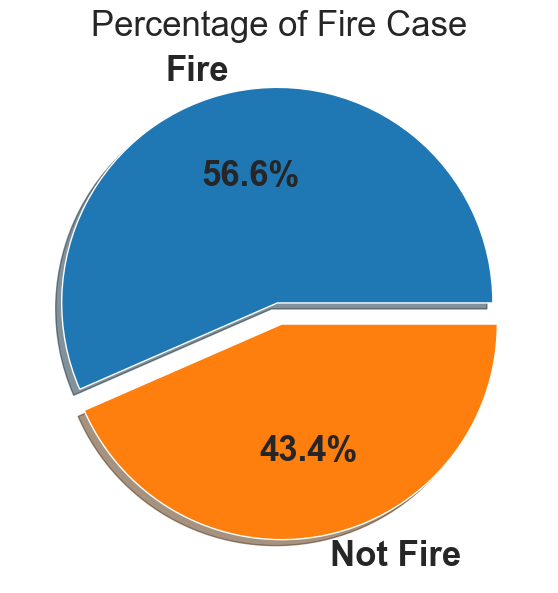

In [17]:
perc = df.Classes.value_counts(normalize=True)*100

classes_labels=['Fire','Not Fire']
plt.figure(figsize=(7,7))
plt.pie(perc,labels=classes_labels,autopct="%1.1f%%", textprops={'fontweight':'bold', 'fontsize':25}, explode=(0.05,0.05), shadow=True)
plt.title("Percentage of Fire Case", fontsize=25)
plt.show()

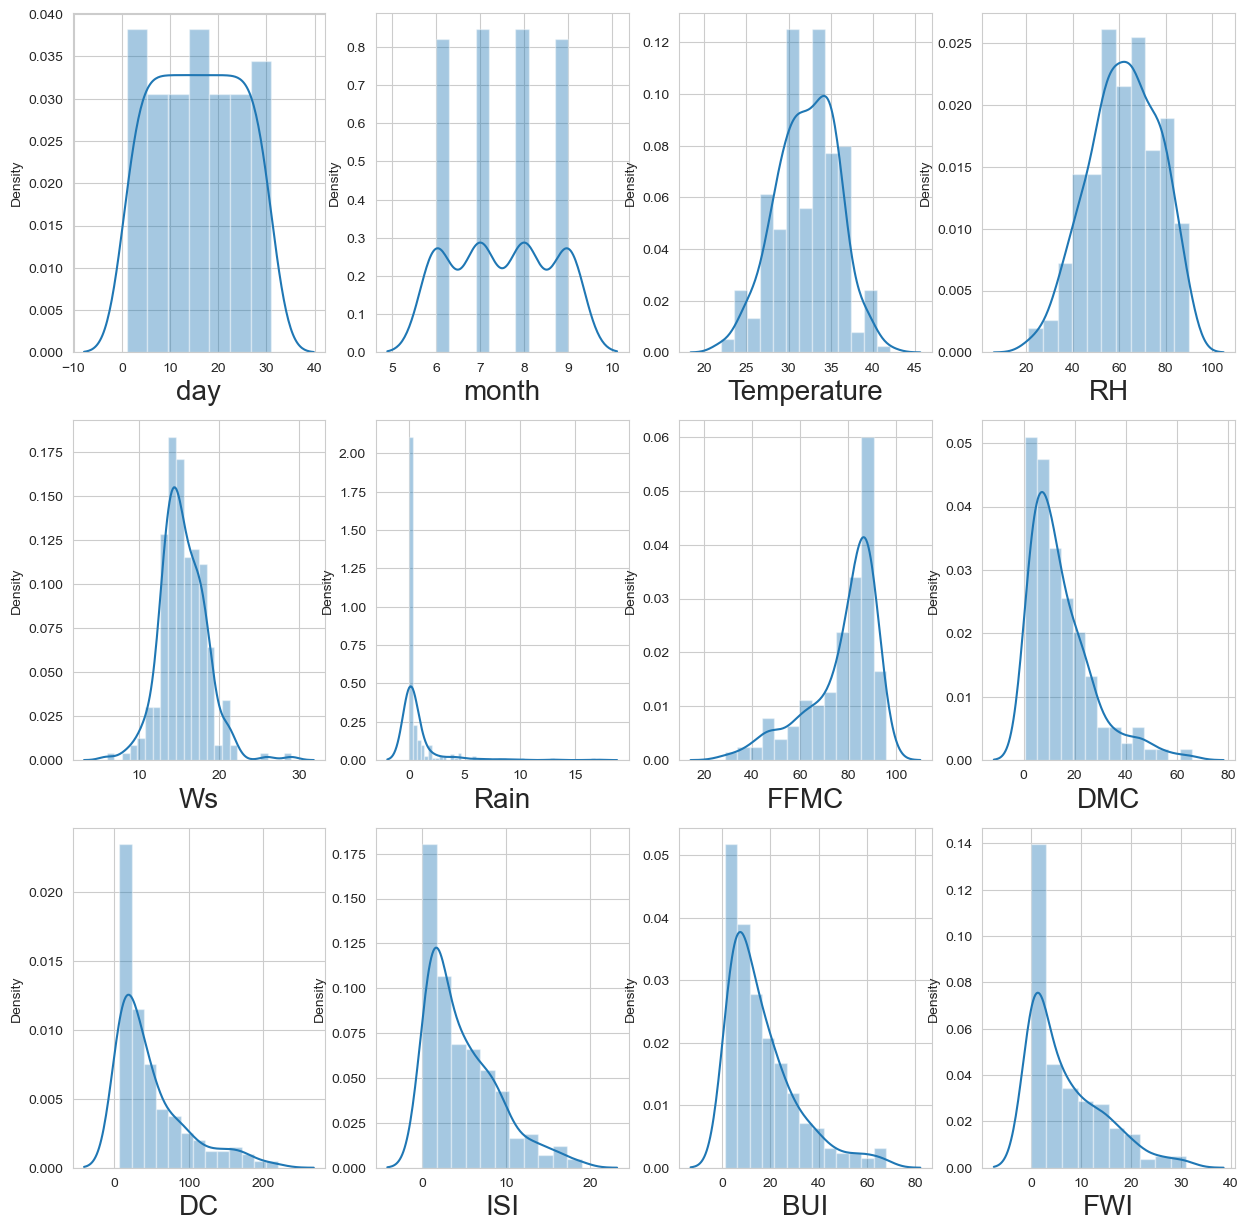

In [22]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is skewness in many columns

> #### ***Checking Outliers using Boxplot***

<AxesSubplot:>

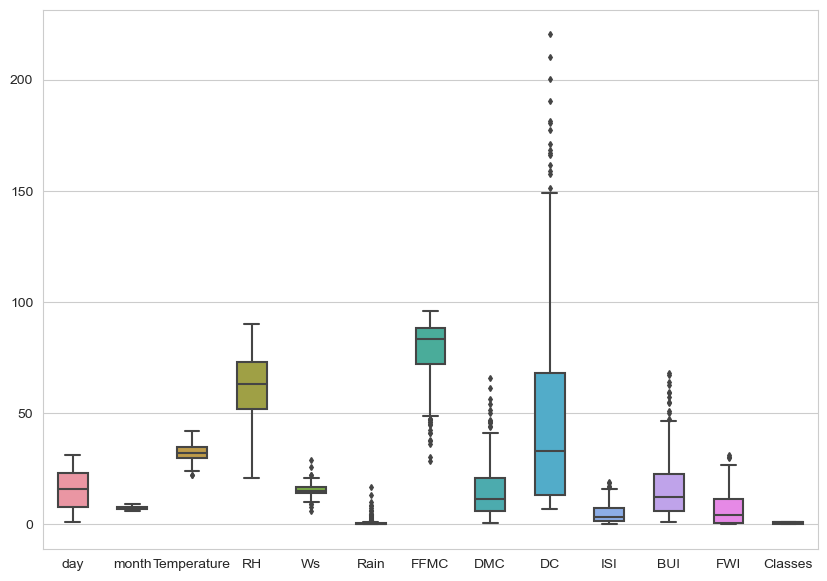

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

Yes there are many outliers in many features but since our data is small & data is quite relevant, so removing this much outliers will lead to information loss.

## Visual Observation of Bivariates / Multivariates

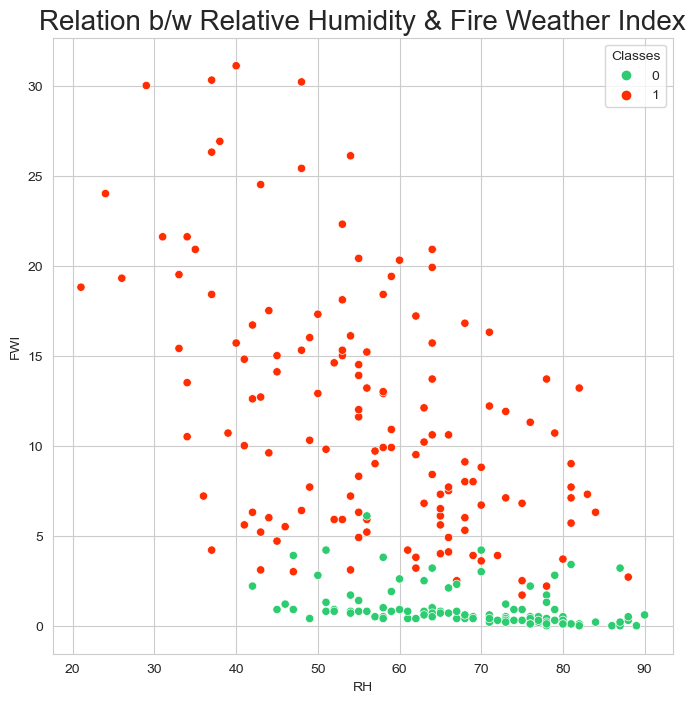

In [34]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='RH', y='FWI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.title("Relation b/w Relative Humidity & Fire Weather Index", fontsize=20)
plt.show();

#### Report :

- Relative Humidity & Fire Weather Index are inversely proportional.
- When RH is low, there is high FWI which increases the Fire Rate.
- When RH is high, there is huge chance of No Fire.

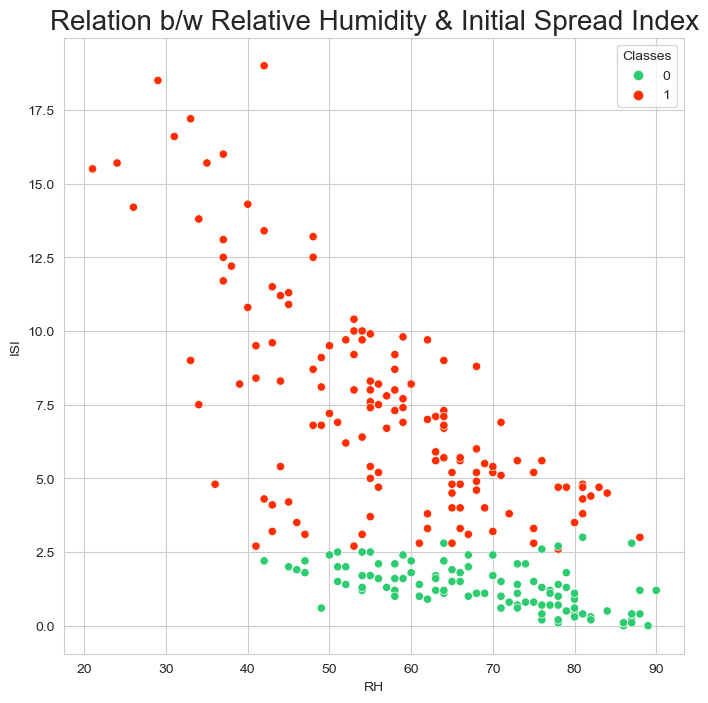

In [35]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='RH', y='ISI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.title("Relation b/w Relative Humidity & Initial Spread Index", fontsize=20)
plt.show();

#### Report :

- Relative Humidity & Initial Spread Index are inversely proportional.
- When RH is low, there is high FWI which increases the Fire Rate.
- When RH is high, there is huge chance of No Fire.

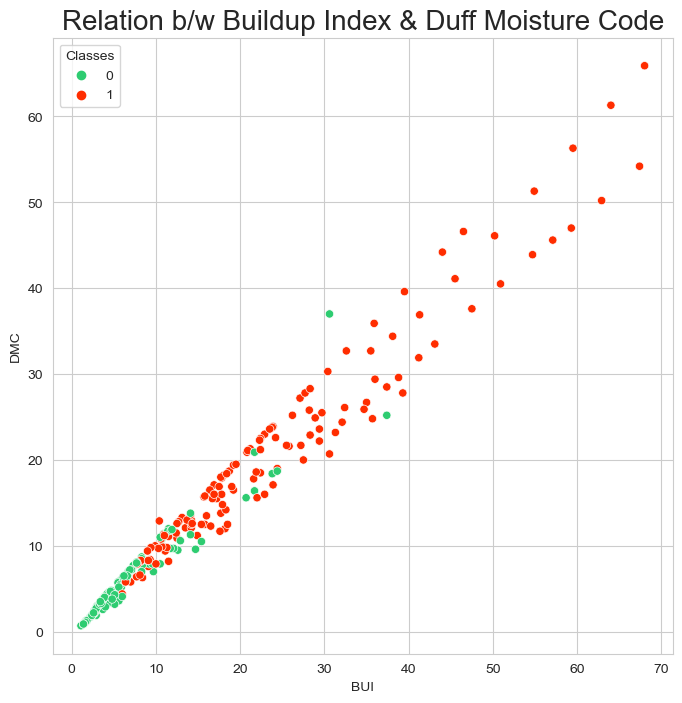

In [36]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='BUI', y='DMC', data=df, hue='Classes',palette=['#2ECC71',"#FF2D00"] )
plt.title("Relation b/w Buildup Index & Duff Moisture Code", fontsize=20)
plt.show();

#### Report :

- Buildup Index (BUI) and Duff Moisture Code (DMC) are highly correlated and directly proportioal to each other
- When both fo them are HIGH there are HIGH chances of Fire!

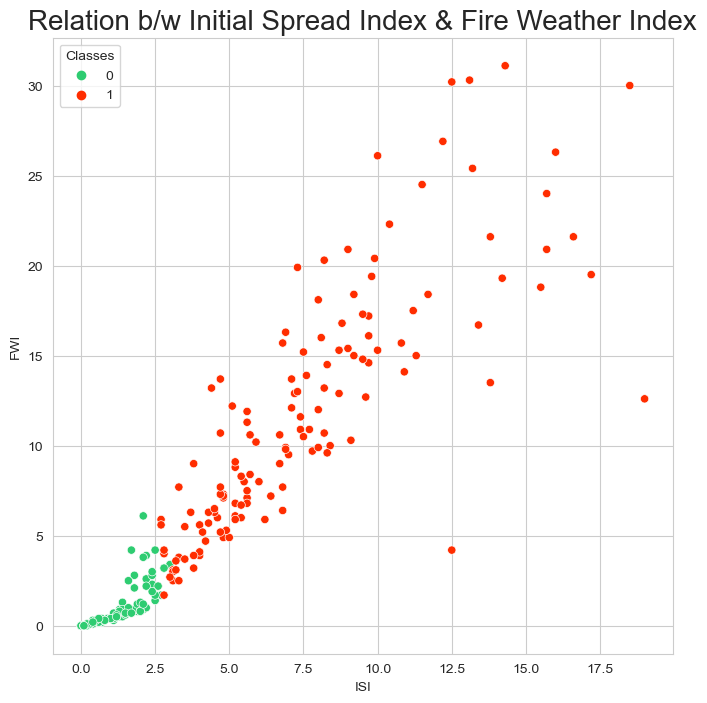

In [37]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='ISI', y='FWI', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.title("Relation b/w Initial Spread Index & Fire Weather Index", fontsize=20)
plt.show();

#### Report :

- Initial Spread Index (ISI) and Fire Weather Index (FWI) are highly correlated and directly proportional to each other
- When both fo them are HIGH there are HIGH chances of Fire!

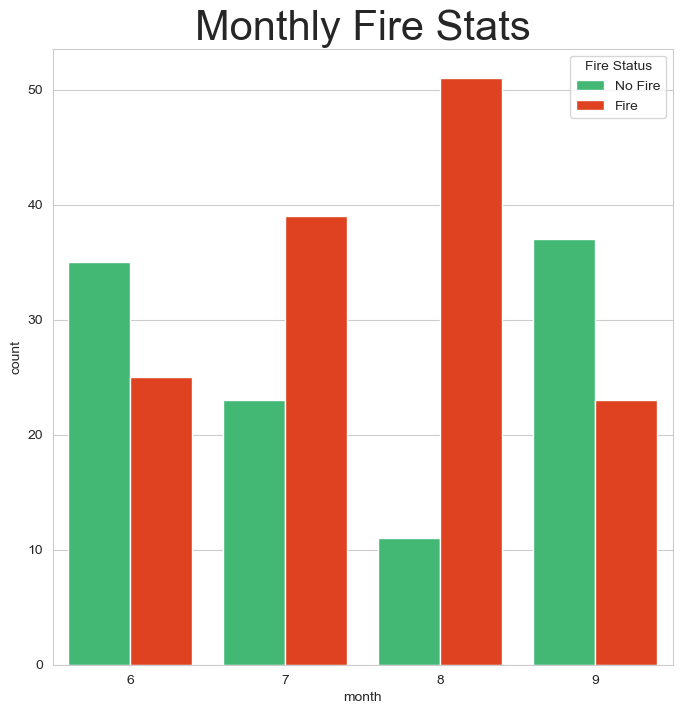

In [38]:
plt.figure(figsize=(8, 8))
sns.countplot(x='month', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Monthly Fire Stats", fontsize=30)
plt.show();

#### Report :

- July & August Month has very high chances of having Fire in Forest.
- August is most vulnerable out of all.
- September is lowest among all.

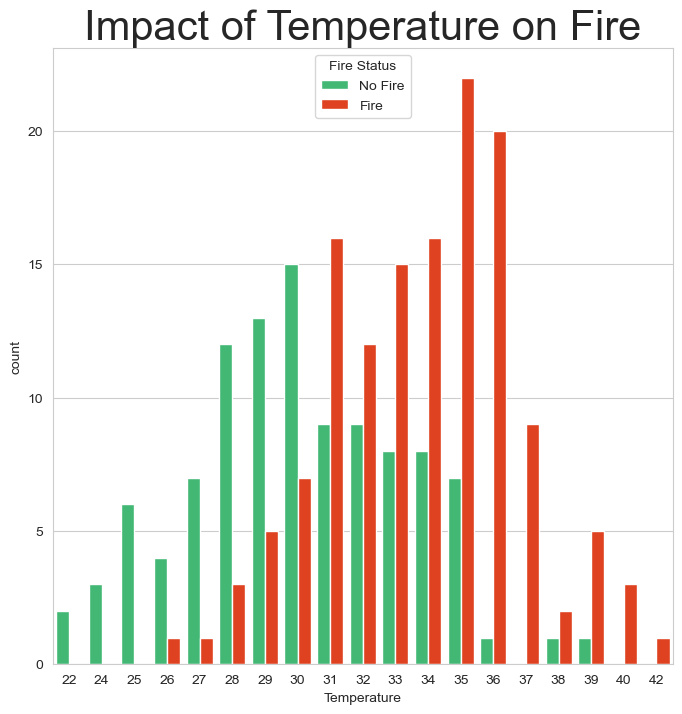

In [39]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Temperature', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Impact of Temperature on Fire", fontsize=30)
plt.show();

#### Report :

- When Temperature is low i.e. under 26, there is NO fire case.
- When Temperature is high i.e. above 30, there are high cases of fire.
- Temperature and Fire Rate Case direct proportionality can be easily seen.

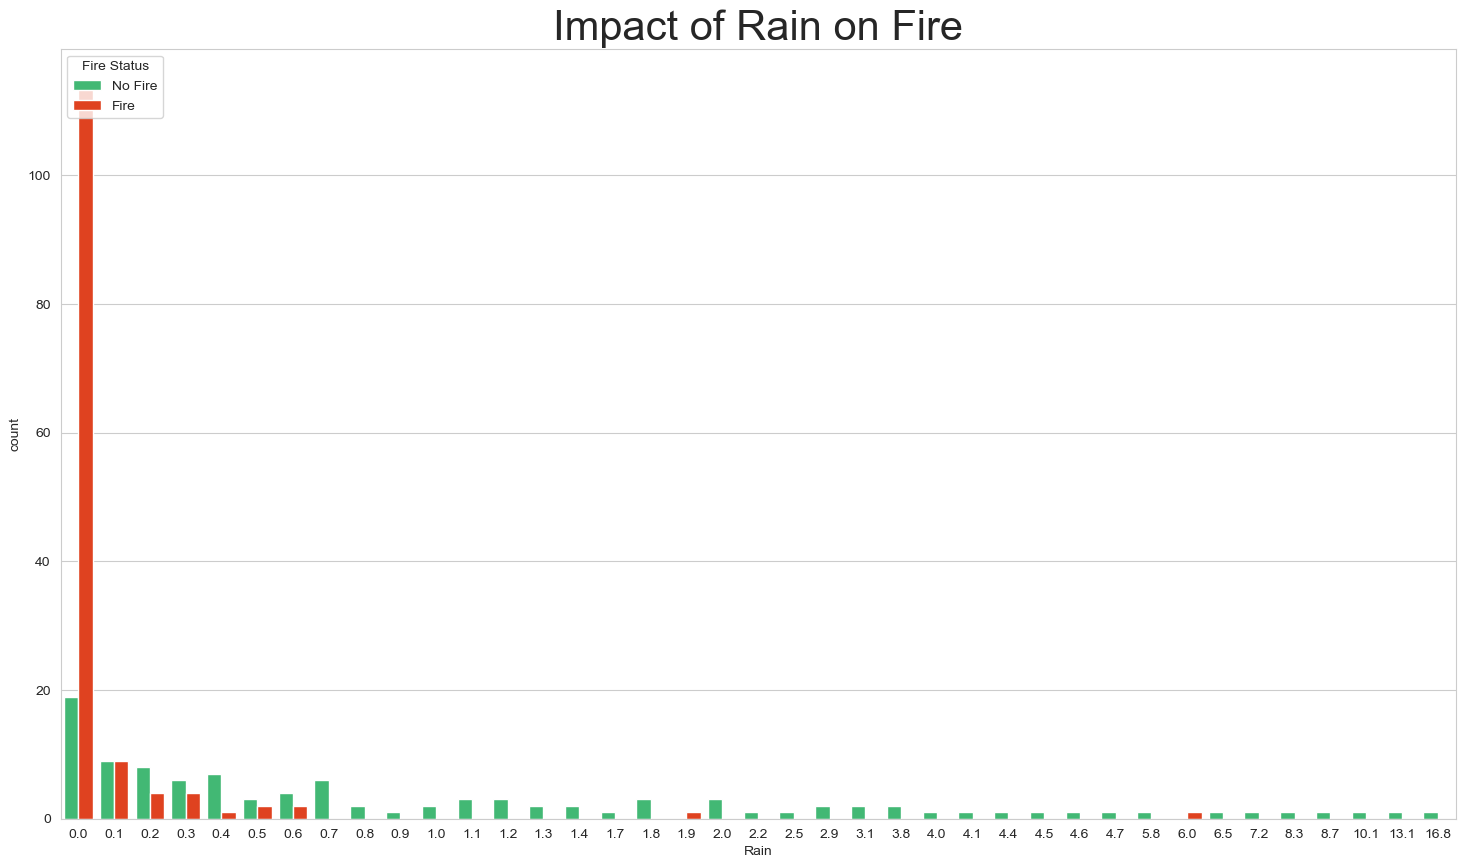

In [40]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Rain', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'])
plt.title("Impact of Rain on Fire", fontsize=30)
plt.show();

#### Report :

- Area of Algeria receive really less rainfall.
- Majority of data lies under 1mm.
- As soon it rains more than 0.6mm, there are rarely any Forest Fire Case.
- There is strikingly high case of Fire when there is NO RAIN.

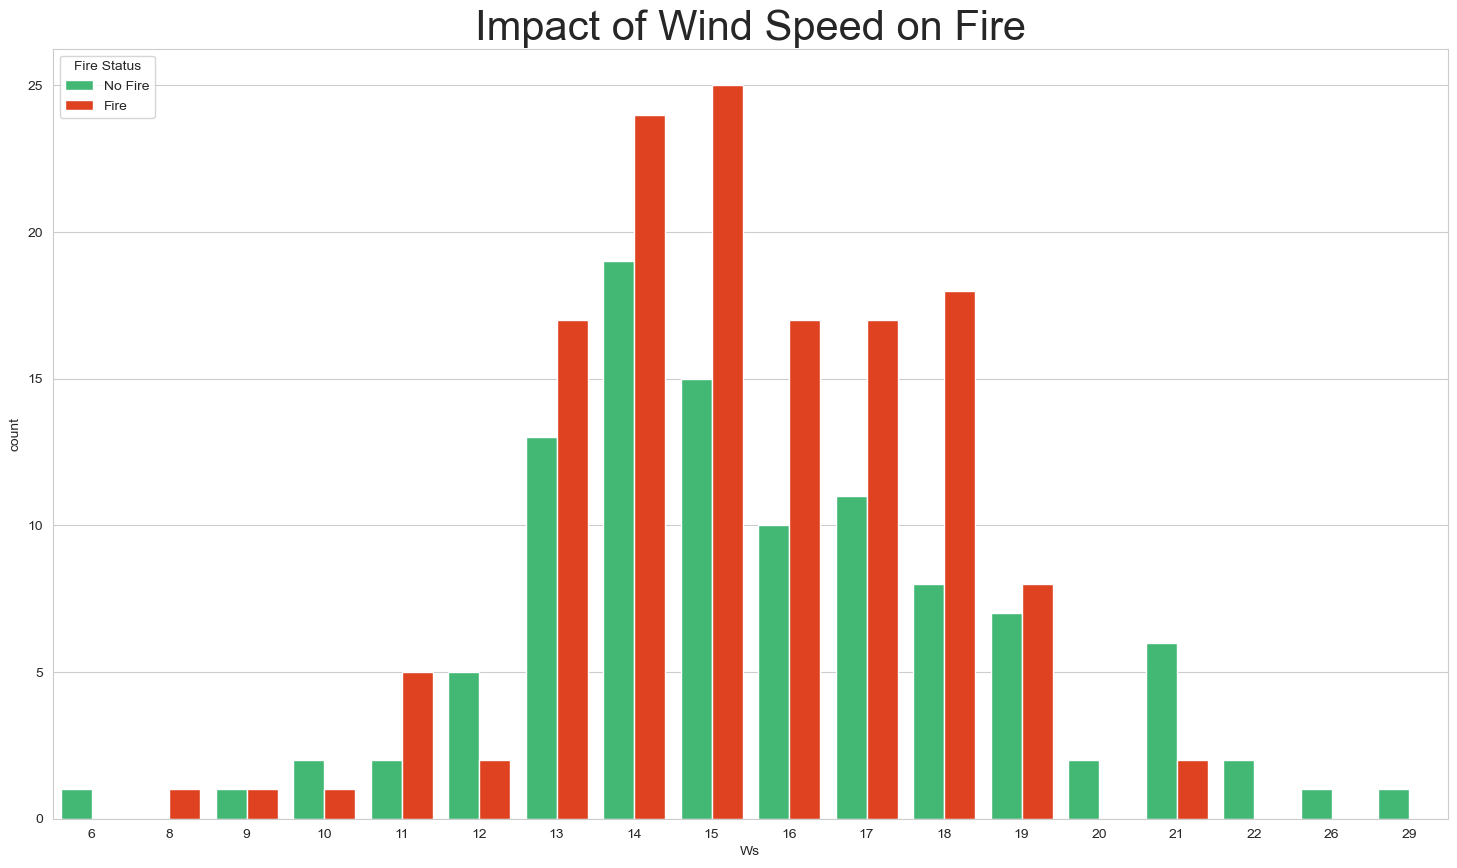

In [41]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Ws', data=df, hue='Classes', palette=['#2ECC71',"#FF2D00"])
plt.legend(title='Fire Status', labels=['No Fire', 'Fire'], loc='upper left')
plt.title("Impact of Wind Speed on Fire", fontsize=30)
plt.show();

#### Report :

- Wind Speed doesn't seems to have much impact on Fire Cases.
- When Wind speed is quite low and when wind speed is quite high, in both cases we see almost no case.
- There is high concentration of Fire Incidents when wind speed is between 13km/h to 19km/h.

--------------------------------------------------

## Model Training

In [42]:
# INDEPENDENT Features
X = df.drop(columns = ['Classes'])

# Dependent Feature
y = df['Classes']

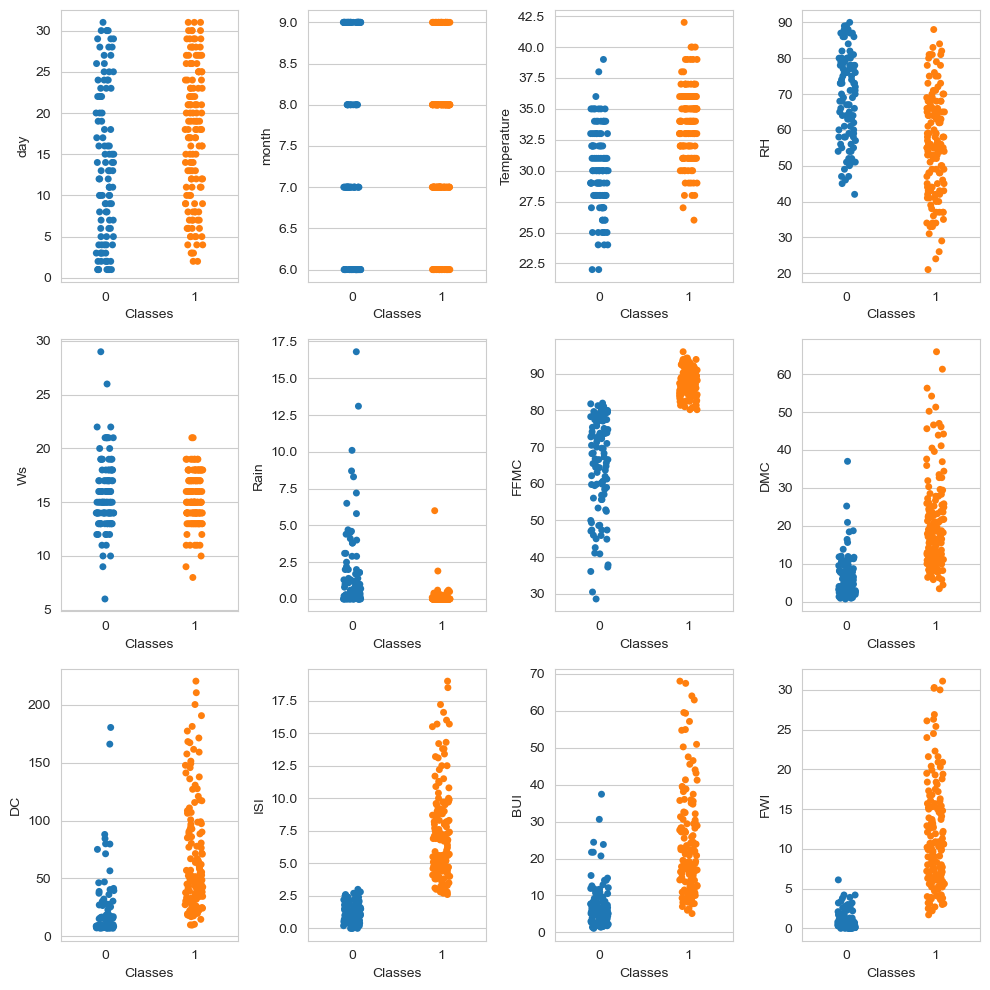

In [48]:
# let's see how data is distributed for every column

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [46]:
# Standardization

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [49]:
# Checking Scaled Data

X_scaled[:10]

array([[-1.67527776, -1.35052592, -0.87473544, -0.33247844,  0.88999047,
        -0.38122294, -0.85180097, -0.91336495, -0.8772513 , -0.83378594,
        -0.93573985, -0.88013664],
       [-1.56173115, -1.35052592, -0.87473544, -0.0631847 , -0.89291326,
         0.27030678, -0.94265821, -0.85665112, -0.8772513 , -0.90578444,
        -0.90046818, -0.89362787],
       [-1.44818455, -1.35052592, -1.70200461,  1.35060746,  2.31631345,
         6.18419195, -2.15175843, -0.98628273, -0.88777281, -1.07378094,
        -0.98512017, -0.93410154],
       [-1.33463795, -1.35052592, -1.977761  ,  1.82187151, -0.89291326,
         0.87171883, -3.44472688, -1.08350644, -0.89198141, -1.14577945,
        -1.0556635 , -0.94759277],
       [-1.22109134, -1.35052592, -1.42624822,  1.01399028,  0.17682898,
        -0.38122294, -0.91470214, -0.94577285, -0.73836741, -0.85778544,
        -0.90046818, -0.88013664],
       [-1.10754474, -1.35052592, -0.32322265,  0.34075592, -0.53633252,
        -0.38122294,  

In [51]:
# Multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.481911,day
1,1.089298,month
2,2.428104,Temperature
3,2.796653,RH
4,1.313000,Ws
5,1.551754,Rain
6,3.992771,FFMC
7,76.275972,DMC
8,25.418078,DC
9,18.083387,ISI


In [52]:
# Splitting the data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [53]:
# Performing Logistic Regression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.26749001 -0.04024801  0.05168044  0.0835345  -0.03300102  0.12234789
   2.39765275 -0.1160631   0.04572423  2.38573059  0.41117558  1.91138721]]
[1.48754681]


In [54]:
y_pred = log_reg.predict(x_test)

In [69]:
dat = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
dat.head(10)

,Actual,Predicted
96,1,0
134,1,1
121,0,0
145,0,0
107,0,0
22,1,1
192,1,1
239,0,0
168,1,1
88,1,1


> ### ***Performance Metrics***

In [61]:
# Accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:- ",accuracy)

Accuracy:-  0.9836065573770492


> #### Confusion matrix

![image](https://assets.datacamp.com/production/repositories/223/datasets/0e0c427adb3aeccf7502f02b6ab14a60f46b248c/ch2_video2.png)

In [62]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 1, 33]], dtype=int64)

In [63]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [64]:
# Breaking down the formula for Accuracy (Manual Checking)

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9836065573770492

In [65]:
# Precison

Precision = true_positive/(true_positive+false_positive)
print("Precision:- ",Precision)

Precision:-  1.0


In [66]:
# Recall

Recall = true_positive/(true_positive+false_negative)
print("Recall:- ",Recall)

Recall:-  0.9642857142857143


In [67]:
# F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1 Score:- ", F1_Score)

F1 Score:-  0.9818181818181818
